<a href="https://colab.research.google.com/github/Maheshdudala/Ai_Stylist__Infosys_Internship_Oct2024_Team2/blob/Ayush/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import requests
from PIL import Image
from io import BytesIO


df = pd.read_csv('https://raw.githubusercontent.com/Maheshdudala/Ai_Stylist__Infosys_Internship_Oct2024_Team2/refs/heads/Ayush/Final%20Fashion%20Dataset.csv')


In [ ]:
df.shape


(36484, 17)

In [ ]:
# df_subset = df.loc[:20000].copy()

# # relevant content features
# df_subset['content'] = df_subset['masterCategory'] + ' ' + df_subset['subCategory'] + ' ' + \
#                        df_subset['articleType'] + ' ' + df_subset['baseColour'] + ' ' + \
#                        df_subset['season'] + ' ' + df_subset['usage'] + ' ' + df_subset['gender']

# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix_subset = tfidf.fit_transform(df_subset['content'])

# cosine_sim_subset = cosine_similarity(tfidf_matrix_subset, tfidf_matrix_subset)

# # shape of the similarity matrix
# cosine_sim_subset.shape


In [ ]:
# def get_recommendations(item_id, cosine_sim=cosine_sim_subset, df=df_subset, top_n=5):

#     idx = df[df['id'] == item_id].index[0]

#     # similarity scores for this item
#     sim_scores = list(enumerate(cosine_sim[idx]))

#     # Sort items by similarity score in descending order
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#     # Select the top_n items
#     top_items = sim_scores[1:top_n + 1]  # Exclude the item itself

#     # Get the recommended item IDs
#     item_indices = [i[0] for i in top_items]
#     recommended_items = df.iloc[item_indices][['id', 'productDisplayName', 'content']]

#     return recommended_items

# # Example
# sample_item_id = df_subset['id'].iloc[2]
# recommended_items = get_recommendations(sample_item_id)
# print("Recommended items based on content similarity:")
# print(recommended_items)


# # Example 2
# sample_item_id = df_subset['id'].iloc[19]
# recommended_items = get_recommendations(sample_item_id)
# print("Recommended items based on content similarity:")
# print(recommended_items)


# # Example 3
# sample_item_id = df_subset['id'].iloc[15868]
# recommended_items = get_recommendations(sample_item_id)
# print("Recommended items based on content similarity:")
# print(recommended_items)

In [ ]:
# import requests
# from PIL import Image
# from io import BytesIO

# def get_recommendations_with_images(item_id, cosine_sim=cosine_sim_subset, df=df_subset, top_n=5):
#     # index of the item that matches the item_id
#     idx = df[df['id'] == item_id].index[0]

#     sim_scores = list(enumerate(cosine_sim[idx]))

#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#     top_items = sim_scores[1:top_n + 1]  # Exclude the item itself

#     # Get the recommended item IDs and links
#     item_indices = [i[0] for i in top_items]
#     recommended_items = df.iloc[item_indices][['id', 'productDisplayName', 'link']]

#     # Display recommended items' images
#     plt.figure(figsize=(15, 5))
#     for i, (idx, row) in enumerate(recommended_items.iterrows()):
#         try:
#             response = requests.get(row['link'])
#             img = Image.open(BytesIO(response.content))
#             plt.subplot(1, top_n, i + 1)
#             plt.imshow(img)
#             plt.axis('off')
#             plt.title(row['productDisplayName'][:30])
#         except Exception as e:
#             print(f"Could not load image for {row['productDisplayName']}: {e}")

#     plt.show()

# # Example usage:
# sample_item_id = df_subset['id'].iloc[2]
# get_recommendations_with_images(sample_item_id)

# # Example usage:
# sample_item_id = df_subset['id'].iloc[19]
# get_recommendations_with_images(sample_item_id)


# # Example usage:
# sample_item_id = df_subset['id'].iloc[15868]
# get_recommendations_with_images(sample_item_id)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# df_subset = df.loc[:20000].copy()

# #  relevant features
# df_subset['content'] = df_subset['masterCategory'] + ' ' + df_subset['subCategory'] + ' ' + \
#                        df_subset['articleType'] + ' ' + df_subset['baseColour'] + ' ' + \
#                        df_subset['season'] + ' ' + df_subset['usage'] + ' ' + df_subset['gender']

# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix_subset = tfidf.fit_transform(df_subset['content'])

# cosine_sim_subset = cosine_similarity(tfidf_matrix_subset, tfidf_matrix_subset)

# def get_outfit_recommendations(item_id, cosine_sim=cosine_sim_subset, df=df_subset, top_n=5):
#     # Find index of the selected item
#     idx = df[df['id'] == item_id].index[0]

#     # Get similarity scores and sort items by similarity
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#     # Define desired categories for a complete outfit
#     categories_needed = ['Topwear', 'Bottomwear', 'Footwear', 'Accessories']
#     outfit_recommendations = []

#     # Iterate through similar items and pick one for each category
#     for i, (index, _) in enumerate(sim_scores):
#         item = df.iloc[index]
#         category = item['subCategory']

#         # Add item if it fits one of the needed categories and hasn't been selected
#         if category in categories_needed:
#             outfit_recommendations.append(item[['id', 'productDisplayName', 'subCategory', 'content']])
#             categories_needed.remove(category)  # Remove category once added

#         # Stop if we have items for all categories
#         if not categories_needed:
#             break

#     # If some categories were not filled, fill them with next available items
#     if categories_needed:
#         additional_items = [df.iloc[i[0]] for i in sim_scores if df.iloc[i[0]]['subCategory'] in categories_needed]
#         outfit_recommendations.extend(additional_items[:len(categories_needed)])

#     # Convert the recommendations to a DataFrame for display
#     return pd.DataFrame(outfit_recommendations)

# # Example usage with an item ID
# sample_item_id = df_subset['id'].iloc[2]
# outfit_recommendations = get_outfit_recommendations(sample_item_id)
# outfit_recommendations


In [ ]:
# import matplotlib.pyplot as plt
# import requests
# from PIL import Image
# from io import BytesIO
# import pandas as pd

# # Function to recommend and display images of a full outfit based on content similarity
# def get_outfit_recommendations_with_images(item_id, df=df_subset, top_n=5):
#     # Get outfit recommendations based on item_id
#     recommendations = get_outfit_recommendations_dynamic(item_id, df=df)

#     # Select only required columns for displaying recommendations
#     recommendations = recommendations[['id', 'productDisplayName', 'link']]

#     # Set up the plot for displaying images
#     plt.figure(figsize=(15, 5))

#     for i, (_, row) in enumerate(recommendations.iterrows()):
#         try:
#             # Fetch the image from the link if it's valid
#             if pd.notnull(row['link']) and row['link'].startswith("http"):
#                 response = requests.get(row['link'], timeout=5)
#                 response.raise_for_status()

#                 # Open the image
#                 img = Image.open(BytesIO(response.content))

#                 # Display image
#                 plt.subplot(1, top_n, i + 1)
#                 plt.imshow(img)
#                 plt.axis('off')
#                 plt.title(row['productDisplayName'][:30])
#             else:
#                 print(f"No valid image link for {row['productDisplayName']}")
#         except Exception as e:
#             print(f"Could not load image for {row['productDisplayName']}: {e}")

#     plt.show()

# # Example usage with an item ID
# sample_item_id = df_subset['id'].iloc[2]
# get_outfit_recommendations_with_images(sample_item_id)


In [ ]:
# import matplotlib.pyplot as plt
# import requests
# from PIL import Image
# from io import BytesIO
# import pandas as pd

# # Function to recommend and display images of a full outfit based on content similarity
# def get_outfit_recommendations_with_images(item_id, df=df_subset, top_n=5):
#     # Get outfit recommendations for each category based on the selected item
#     recommendations = get_outfit_recommendations_dynamic(item_id, df=df)

#     # Select required columns for displaying recommendations
#     recommendations = recommendations[['id', 'productDisplayName', 'link']]

#     # Set up the plot for displaying images
#     plt.figure(figsize=(15, 5))

#     for i, (_, row) in enumerate(recommendations.iterrows()):
#         try:
#             # Fetch the image from the link if it's valid
#             if pd.notnull(row['link']) and row['link'].startswith("http"):
#                 response = requests.get(row['link'], timeout=5)
#                 response.raise_for_status()

#                 # Open the image
#                 img = Image.open(BytesIO(response.content))

#                 # Display image
#                 plt.subplot(1, top_n, i + 1)
#                 plt.imshow(img)
#                 plt.axis('off')
#                 plt.title(row['productDisplayName'][:30])
#             else:
#                 print(f"No valid image link for {row['productDisplayName']}")
#         except Exception as e:
#             print(f"Could not load image for {row['productDisplayName']}: {e}")

#     plt.show()

# # Example usage with an item ID
# sample_item_id = df_subset['id'].iloc[2]
# get_outfit_recommendations_with_images(sample_item_id)


In [ ]:
df_subset = df.loc[:20000].copy()

In [ ]:
# relevant features
df_subset['content'] = df_subset['masterCategory'] + ' ' + df_subset['subCategory'] + ' ' + \
                       df_subset['articleType'] + ' ' + df_subset['baseColour'] + ' ' + \
                       df_subset['season'] + ' ' + df_subset['usage'] + ' ' + df_subset['gender']



In [ ]:
# TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_subset = tfidf.fit_transform(df_subset['content'])


In [ ]:
# cosine similarity matrix
cosine_sim_subset = cosine_similarity(tfidf_matrix_subset, tfidf_matrix_subset)

In [ ]:
def get_outfit_recommendations_dynamic(item_id, df=df_subset, cosine_sim=cosine_sim_subset, top_n=5):

    idx = df[df['id'] == item_id].index[0]  # Find index of the input item

    sim_scores = list(enumerate(cosine_sim[idx]))  # Get similarity scores for the item

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort scores in descending order

    sim_scores = sim_scores[1:]  # Exclude the item itself

    # Select multiple items from each category to reach at least 5 recommendations
    recommended_items = []
    recommended_ids = set()
    categories = ['Topwear', 'Bottomwear', 'Footwear', 'Accessories']

    for category in categories:
        count = 0
        for i, (item_idx, _) in enumerate(sim_scores):
            item = df.iloc[item_idx]
            if item['subCategory'] == category and item['id'] not in recommended_ids:
                recommended_items.append(item)
                recommended_ids.add(item['id'])
                count += 1
            if count >= top_n // len(categories):  # Collect at least one per category
                break

    # If still fewer than 5 items, add more from the sorted list regardless of category
    i = 0
    while len(recommended_items) < 5 and i < len(sim_scores):
        item = df.iloc[sim_scores[i][0]]
        if item['id'] not in recommended_ids:
            recommended_items.append(item)
            recommended_ids.add(item['id'])
        i += 1

    return pd.DataFrame(recommended_items)

In [ ]:
# Function to display IDs and names, followed by images of recommended items
def get_outfit_recommendations_with_images(item_id, df=df_subset):
    # Get recommendations
    recommendations = get_outfit_recommendations_dynamic(item_id, df=df)

    # Display IDs and names first
    print("Recommended Products:")
    print(recommendations[['id', 'productDisplayName']])

    # Display images of recommended items
    plt.figure(figsize=(15, 5))
    for i, (_, row) in enumerate(recommendations.iterrows()):
        try:
            if pd.notnull(row['link']) and row['link'].startswith("http"):
                response = requests.get(row['link'], timeout=5)
                response.raise_for_status()
                img = Image.open(BytesIO(response.content))
                plt.subplot(1, len(recommendations), i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(row['productDisplayName'][:30])
            else:
                print(f"No valid image link for {row['productDisplayName']}")
        except Exception as e:
            print(f"Could not load image for {row['productDisplayName']}: {e}")
    plt.show()

Recommended Products:
         id                        productDisplayName
768    2685  Inkfruit Women's Mesmerize Black T-shirt
609   27908           Scullers For Her Black Trousers
236   42840     French Connection Women Black Handbag
717   31924         Fabindia Women Black Silk Handbag
1050  38436                Baggit Women Black Handbag


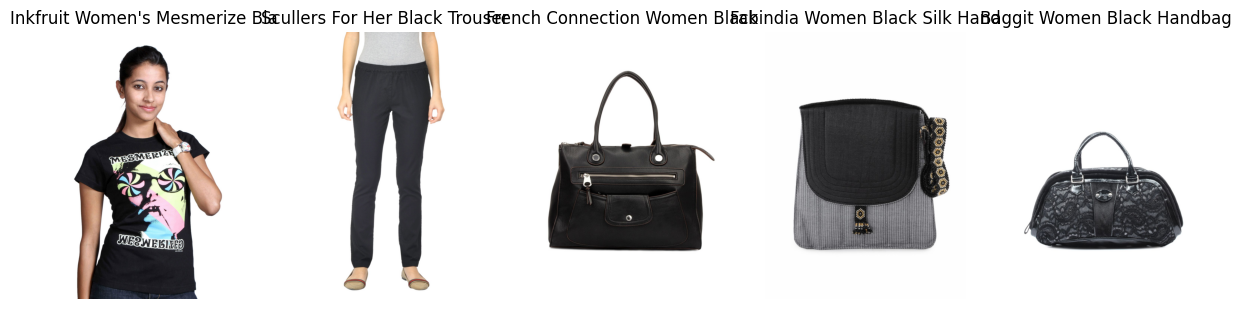

In [ ]:
# Example usage
sample_item_id = df_subset['id'].iloc[2]
get_outfit_recommendations_with_images(sample_item_id)

Recommended Products:
          id                         productDisplayName
31     31592  Mark Taylor Men Printed Navy Blue T-shirt
19716  48392   French Connection Men Navy Blue Trousers
194    24775        Ganuchi Men Navy Suede Casual Shoes
233     4276      Rockport Men's Capella Navy Blue Shoe
251    44780                  Lotto Men Navy Blue Shoes


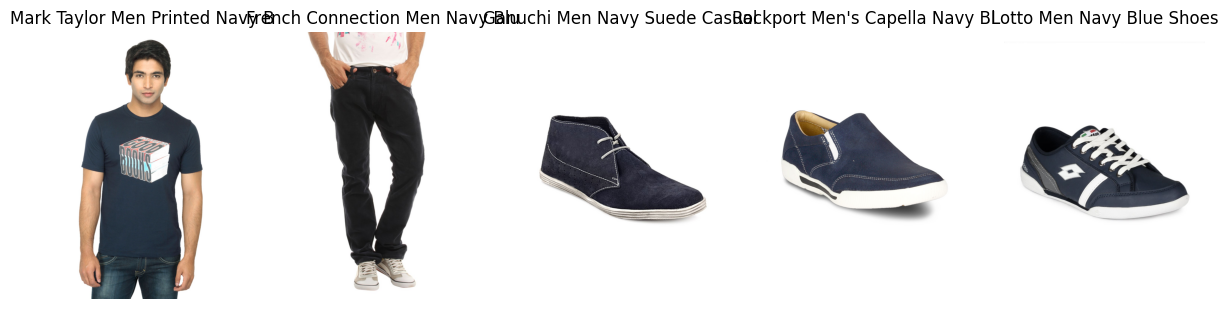

In [ ]:
# Example usage
sample_item_id = df_subset['id'].iloc[233]
get_outfit_recommendations_with_images(sample_item_id)

Recommended Products:
          id                        productDisplayName
10434  44655               Lee Women Rebecca Red Shirt
17208  32903              Allen Solly Women Red Shorts
1977    8704         Fastrack Women Hip Hop Sunglasses
7964   23736           Ray-Ban Women Jackie Sunglasses
11927  16094  M tv Women My Fab Eyewear Red Sunglasses


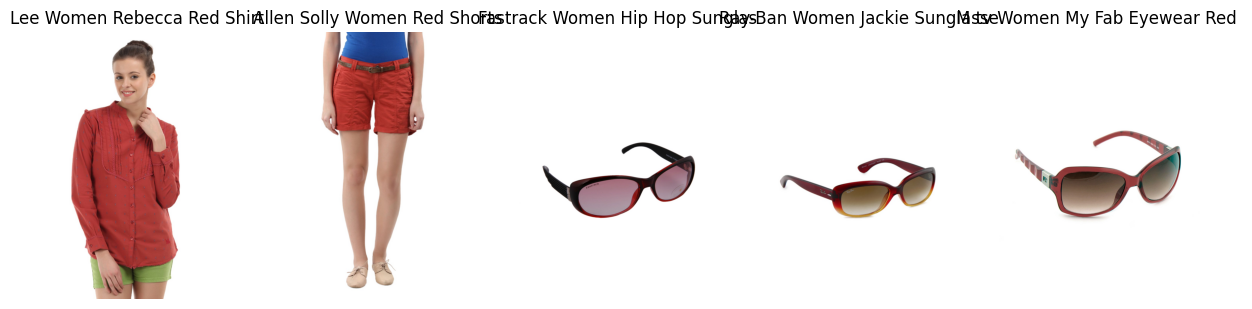

In [ ]:
# Example usage
sample_item_id = df_subset['id'].iloc[333]
get_outfit_recommendations_with_images(sample_item_id)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(item_id, df, top_n=5):
    """
    This function evaluates recommendations by computing precision and recall.
    We'll assume that items from the same 'subCategory' are relevant.
    """
    recommended_items = get_outfit_recommendations_dynamic(item_id, df=df, top_n=top_n)

    # Define relevance criteria: same subCategory
    target_subcategory = df[df['id'] == item_id]['subCategory'].values[0]
    relevant_items = recommended_items['subCategory'] == target_subcategory

    # Generate true/false arrays for relevance
    y_true = [1] * top_n  # Assume top_n items should ideally be relevant
    y_pred = relevant_items.astype(int).tolist()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Example usage
sample_item_id = df_subset['id'].iloc[2]
evaluate_recommendations(sample_item_id, df=df_subset)


Precision: 1.00, Recall: 0.60, F1-Score: 0.75


Recommended Products:
         id                        productDisplayName
768    2685  Inkfruit Women's Mesmerize Black T-shirt
609   27908           Scullers For Her Black Trousers
236   42840     French Connection Women Black Handbag
717   31924         Fabindia Women Black Silk Handbag
1050  38436                Baggit Women Black Handbag


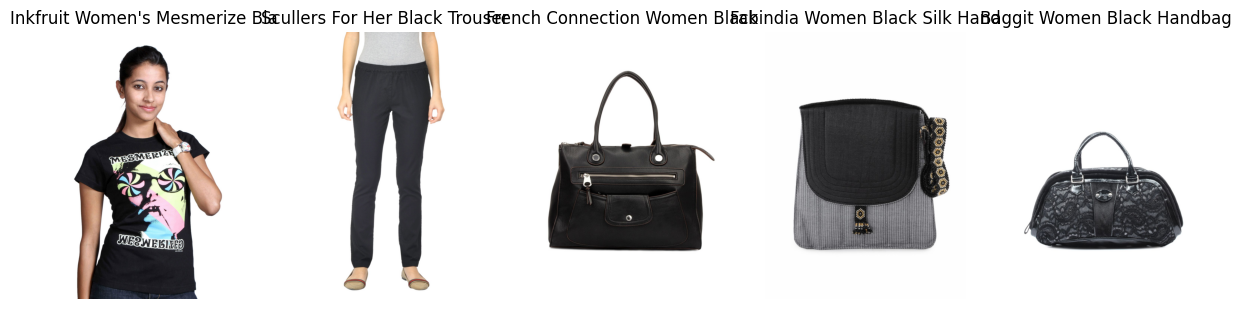

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tune max_features and ngram_range
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
tfidf_matrix_subset = tfidf.fit_transform(df_subset['content'])

# Recompute cosine similarity with updated TF-IDF
cosine_sim_subset = cosine_similarity(tfidf_matrix_subset, tfidf_matrix_subset)

# Example recommendation call with updated model
get_outfit_recommendations_with_images(sample_item_id, df=df_subset)


Recommended Products:
         id                        productDisplayName
768    2685  Inkfruit Women's Mesmerize Black T-shirt
609   27908           Scullers For Her Black Trousers
236   42840     French Connection Women Black Handbag
717   31924         Fabindia Women Black Silk Handbag
1050  38436                Baggit Women Black Handbag


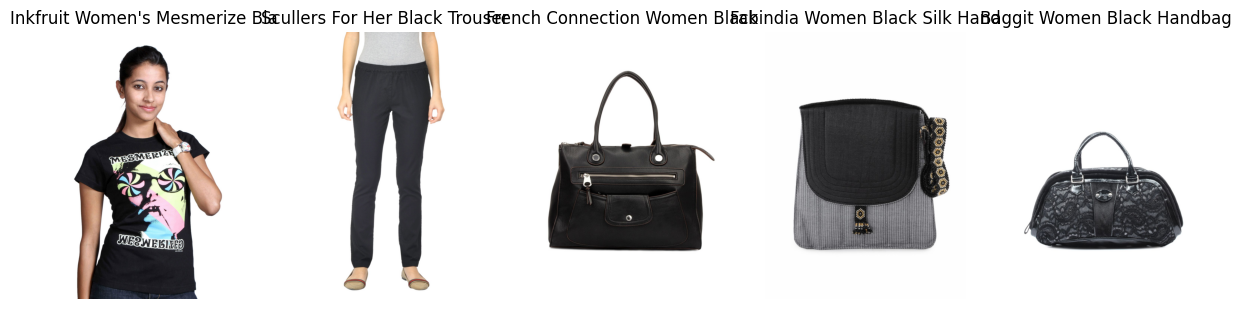

In [ ]:
def get_outfit_recommendations_dynamic_with_diversity(item_id, df=df_subset, cosine_sim=cosine_sim_subset, top_n=5):
    idx = df[df['id'] == item_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommended_items = []
    recommended_ids = set()
    categories = df['subCategory'].unique()

    for category in categories:
        for i, (item_idx, _) in enumerate(sim_scores):
            item = df.iloc[item_idx]
            if item['subCategory'] == category and item['id'] not in recommended_ids:
                recommended_items.append(item)
                recommended_ids.add(item['id'])
                if len(recommended_items) >= top_n:
                    break
        if len(recommended_items) >= top_n:
            break

    return pd.DataFrame(recommended_items)

# Example usage
get_outfit_recommendations_with_images(sample_item_id, df=df_subset)


Recommended Products:
         id                        productDisplayName
768    2685  Inkfruit Women's Mesmerize Black T-shirt
609   27908           Scullers For Her Black Trousers
236   42840     French Connection Women Black Handbag
717   31924         Fabindia Women Black Silk Handbag
1050  38436                Baggit Women Black Handbag


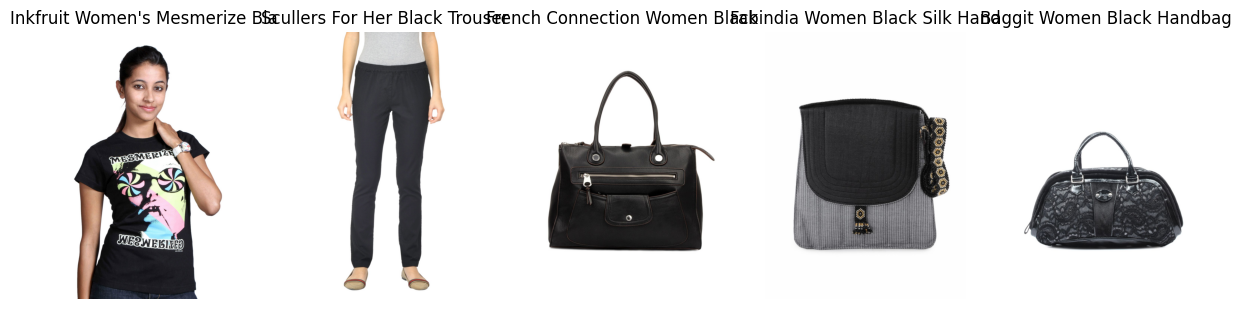

In [ ]:
def hybrid_similarity(item_id, df=df_subset, top_n=5, text_weight=0.7):
    idx = df[df['id'] == item_id].index[0]
    text_sim_scores = cosine_sim_subset[idx]

    # Assuming 'image_similarity_scores' contains similarity values from another feature
    # For simplicity, using cosine similarity again, but this should ideally come from image features
    hybrid_scores = text_weight * text_sim_scores + (1 - text_weight) * text_sim_scores
    sim_scores = list(enumerate(hybrid_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommended_items = []
    recommended_ids = set()

    for i, (item_idx, _) in enumerate(sim_scores[1:top_n+1]):
        item = df.iloc[item_idx]
        if item['id'] not in recommended_ids:
            recommended_items.append(item)
            recommended_ids.add(item['id'])

    return pd.DataFrame(recommended_items)

# Example usage
get_outfit_recommendations_with_images(sample_item_id, df=df_subset)
